# Module 1: Data validation and pre-processing

In [1]:
import numpy as n
import pandas as p
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = p.read_csv('crop.csv') #load the dataset as dataframe

In [4]:
df.columns #Returns columns of dataframe

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [5]:
df.info() #Returns basic description of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.head(3) #Returns first 3 rows of data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [7]:
df.shape #dimension of dataframe

(2200, 8)

In [8]:
df.isnull() #returns True if value is NULL else returns False

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() #Return sum of missing values in each column

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
df.describe() #Returns numerical description

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
sum(df.duplicated()) #Returns sum of duplicate data

0

In [12]:
df.nitrogen.unique() #Returns unique values of nitrogen

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134], dtype=int64)

In [13]:
df['label'].unique() #Returns unique labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
df.potassium.sort_values().unique() #Returns unique values of potassium after sorting

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205], dtype=int64)

In [15]:
df['label'].value_counts() #Returns number of instances of each unique label(crop type)

blackgram      100
jute           100
mungbean       100
kidneybeans    100
mango          100
lentil         100
maize          100
chickpea       100
apple          100
coconut        100
cotton         100
coffee         100
pomegranate    100
grapes         100
muskmelon      100
pigeonpeas     100
banana         100
watermelon     100
orange         100
papaya         100
mothbeans      100
rice           100
Name: label, dtype: int64

In [16]:
df.corr() #Returns pairwise correlation of the columns

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [17]:
col_to_be_encoded = ['label']
le = LabelEncoder() #method to encode and set values between 0 and k-1 for k distinct classes
for i in col_to_be_encoded:
    df[i] = le.fit_transform(df[i]).astype(int) #Returns encoded labels as int datatype

In [18]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [19]:
df.tail(3) #Returns last 3 tuples of data

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,5


# Module 2: Exploratory data analysis and data visualization

In [20]:
df = df.dropna() #Drop NULL values

<AxesSubplot:>

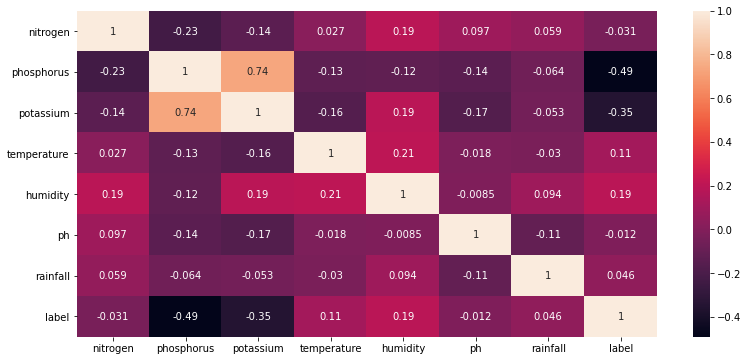

In [21]:
fig, ax = plt.subplots(figsize=(13,6))
s.heatmap(df.corr(), ax=ax, annot=True) #Heatmap to show correlation between features

Text(0, 0.5, 'Total Count')

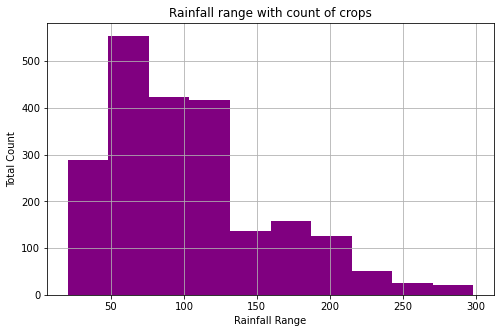

In [22]:
df['rainfall'].hist(figsize=(8,5), color='purple')
plt.title('Rainfall range with count of crops')
plt.xlabel('Rainfall Range')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

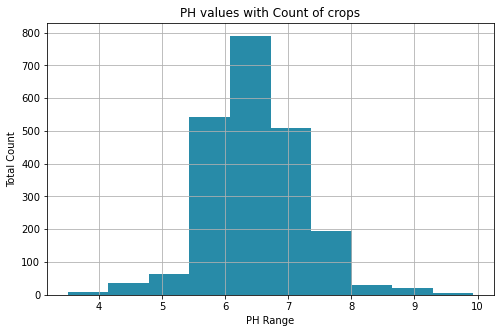

In [23]:
df['ph'].hist(figsize=(8,5), color='#288BA8')
plt.title('PH values with Count of crops')
plt.xlabel('PH Range')
plt.ylabel('Total Count')

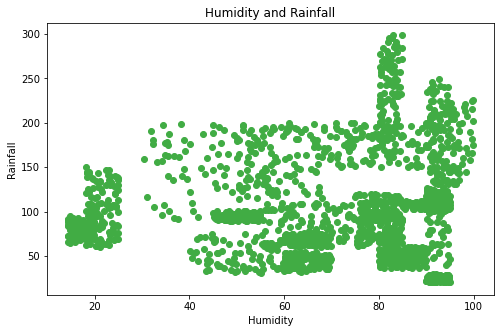

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df['humidity'],df['rainfall'],color='#41AC44')
ax.set_title('Humidity and Rainfall')
ax.set_xlabel('Humidity')
ax.set_ylabel('Rainfall')
plt.show()

<AxesSubplot:xlabel='phosphorus'>

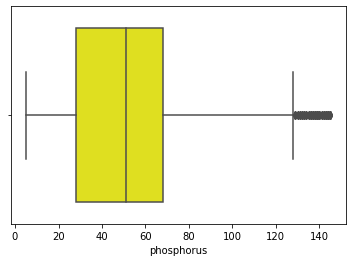

In [25]:
s.boxplot(df['phosphorus'], color='yellow')

<AxesSubplot:xlabel='nitrogen'>

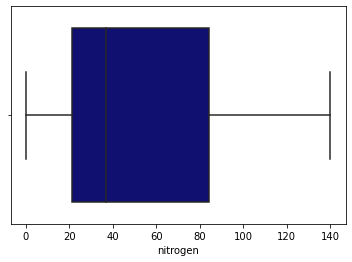

In [26]:
s.boxplot(df['nitrogen'], color='#000080')

<AxesSubplot:xlabel='potassium'>

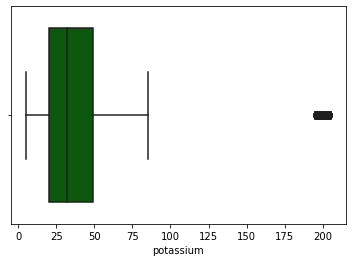

In [27]:
s.boxplot(df['potassium'], color='darkgreen')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

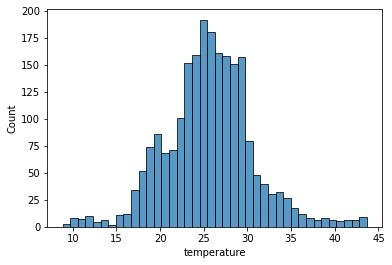

In [28]:
s.histplot(df['temperature'])

'Different types of crops'

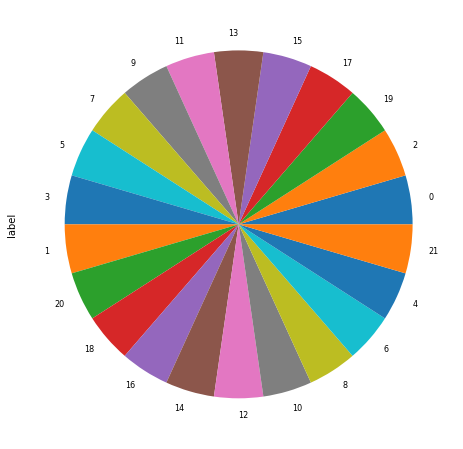

In [29]:
def PropByVar(df,variable): #Propagation by variable
    pie_var = df[variable].value_counts()
    ax = pie_var.plot.pie(figsize=(8,8), fontsize =8)
    return "Different types of crops"
PropByVar(df,'label')

# Algorithm Implementation 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import joblib
from sklearn.model_selection import cross_val_score

In [31]:
inputs = df.drop(labels='label', axis=1) #takes all features except label as input
output = df.loc[:,'label'] #Returns label(crop type) as output

In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=1, stratify=output)
print("Number of Training Datasets: ", len(X_train))
print("Number of Testing Dataset: ", len(X_test))
print("Total Number of Datasets: ", len(X_train)+len(X_test))

Number of Training Datasets:  1540
Number of Testing Dataset:  660
Total Number of Datasets:  2200


# Module 3 Decision Tree Classifier

In [33]:
#Model Training
dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)
predicted_dt = dt.predict(X_test)

In [34]:
#Getting Accuracy
accuracy = accuracy_score(y_test,predicted_dt) # accuracy: (tp + tn) / (p + n)
print('Accuracy of Decision Tree Classifier is: ',accuracy*100)

Accuracy of Decision Tree Classifier is:  99.39393939393939


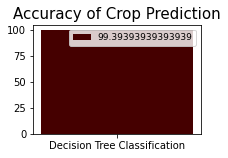

In [35]:
DT1=accuracy.mean() *100
def graph():
    data=[DT1]
    alg="Decision Tree Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#450000"))
    plt.title("Accuracy of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [36]:
#Getting Precision
precision = precision_score(y_test,predicted_dt,average='weighted') # precision tp / (tp + fp) 
#weighted average takes mean of all classes' scores
print('Precision of Decision Tree Classifier is: ',precision*100)

Precision of Decision Tree Classifier is:  99.42265395894427


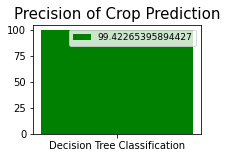

In [37]:
DT2=precision.mean() *100
def graph():
    data=[DT2]
    alg="Decision Tree Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("green"))
    plt.title("Precision of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [38]:
#Getting Recall
recall = recall_score(y_test,predicted_dt,average='weighted') # recall: tp / (tp + fn)
print('Recall of Decision Tree Classifier is: ',recall*100)

Recall of Decision Tree Classifier is:  99.39393939393939


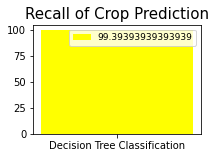

In [39]:
DT3=recall.mean() *100
def graph():
    data=[DT3]
    alg="Decision Tree Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("yellow"))
    plt.title("Recall of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [40]:
#Getting F1 Score
f1 = f1_score(y_test,predicted_dt,average='weighted') # f1: 2 tp / (2 tp + fp + fn)
print('F1 Score of Decision Tree Classifier is: ',f1*100)

F1 Score of Decision Tree Classifier is:  99.396174727584


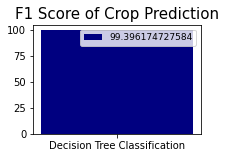

In [41]:
DT4=f1.mean() *100
def graph():
    data=[DT4]
    alg="Decision Tree Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#000080"))
    plt.title("F1 Score of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [42]:
#Classification Report
cr = classification_report(y_test,predicted_dt)
print('Classification report\n',cr)

Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.98        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       0.97      1.00      0.98        30
    

In [43]:
#Confusion Matrix
cm = confusion_matrix(y_test,predicted_dt)
print('Confusion matrix\n',cm)

Confusion matrix
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

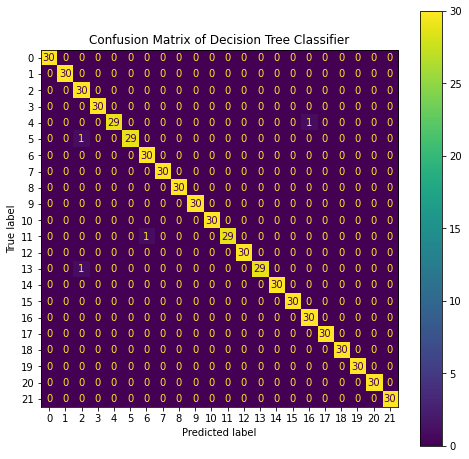

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(dt, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

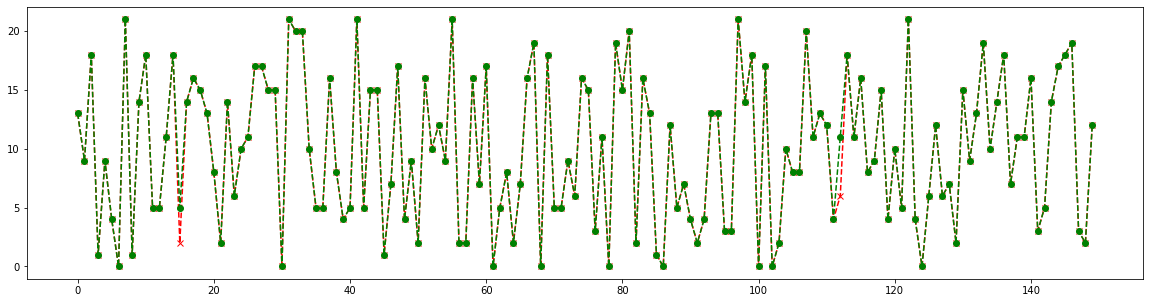

In [45]:
DF1 = p.DataFrame()
DF1["y_test"] = y_test
DF1["predicted"] = predicted_dt
DF1.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF1["predicted"][:150], marker='x', linestyle='dashed', color='red')
plt.plot(DF1["y_test"][:150],  marker='o', linestyle='dashed', color='green')
plt.show()

In [46]:
#Saving Model
joblib.dump(dt,'dt.pkl')

['dt.pkl']

# Module 4 Gaussian Naive Bayes

In [47]:
#Model Training
nb = GaussianNB()
nb.fit(X_train,y_train)
predicted_nb = nb.predict(X_test)

In [48]:
#Getting Accuracy
accuracy = accuracy_score(y_test,predicted_nb) # accuracy: (tp + tn) / (p + n)
print('Accuracy of Naive Bayes is: ',accuracy*100)

Accuracy of Naive Bayes is:  99.39393939393939


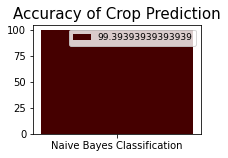

In [49]:
NB1=accuracy.mean() *100
def graph():
    data=[NB1]
    alg="Naive Bayes Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#450000"))
    plt.title("Accuracy of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [50]:
#Getting Precision
precision = precision_score(y_test,predicted_nb,average='weighted') # precision tp / (tp + fp)
print('Precision of Naive Bayes is: ',precision*100)

Precision of Naive Bayes is:  99.40337749014054


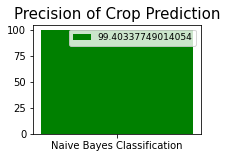

In [51]:
NB2=precision.mean() *100
def graph():
    data=[NB2]
    alg="Naive Bayes Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("green"))
    plt.title("Precision of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [52]:
#Getting Recall
recall = recall_score(y_test,predicted_nb,average='weighted') # recall: tp / (tp + fn)
print('Recall of Naive Bayes is: ',recall*100)

Recall of Naive Bayes is:  99.39393939393939


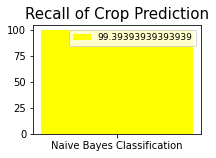

In [53]:
NB3=recall.mean() *100
def graph():
    data=[NB3]
    alg="Naive Bayes Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("yellow"))
    plt.title("Recall of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [54]:
#Getting F1 Score
f1 = f1_score(y_test,predicted_nb,average='weighted') # f1: 2 tp / (2 tp + fp + fn)
print('F1 Score of Naive Bayes is: ',f1*100)

F1 Score of Naive Bayes is:  99.3937709969941


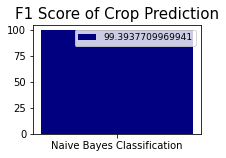

In [55]:
NB4=f1.mean() *100
def graph():
    data=[NB4]
    alg="Naive Bayes Classification"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#000080"))
    plt.title("F1 Score of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [56]:
#Classification Report
cr = classification_report(y_test,predicted_nb)
print('Classification report\n',cr)

Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.97      0.93      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
    

In [57]:
#Confusion Matrix
cm = confusion_matrix(y_test,predicted_nb)
print('Confusion matrix\n',cm)

Confusion matrix
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

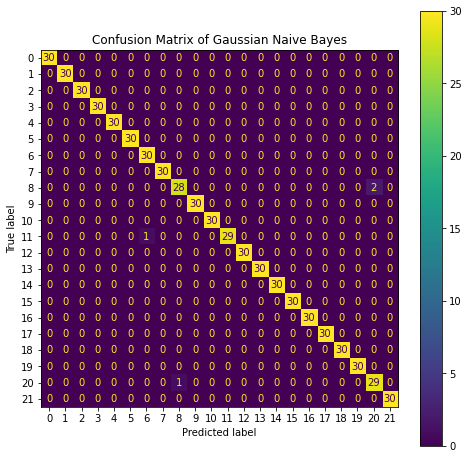

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(nb, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.show()

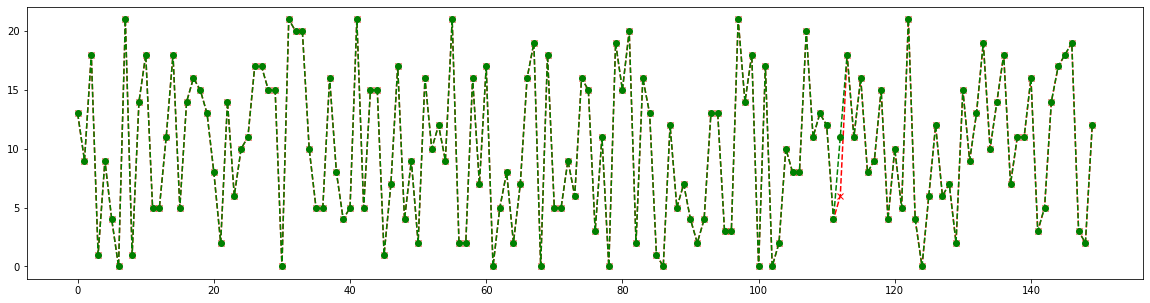

In [59]:
DF2 = p.DataFrame()
DF2["y_test"] = y_test
DF2["predicted"] = predicted_nb
DF2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF2["predicted"][:150], marker='x', linestyle='dashed', color='red')
plt.plot(DF2["y_test"][:150],  marker='o', linestyle='dashed', color='green')
plt.show()

In [60]:
#Saving Model
joblib.dump(nb,'nb.pkl')

['nb.pkl']

# Module 5 AdaBoost classifier

In [61]:
#Model Training
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predicted_ab = ab.predict(X_test)

In [62]:
#Getting Accuracy
accuracy = accuracy_score(y_test,predicted_ab) # accuracy: (tp + tn) / (p + n)
print('Accuracy of Ada Boost Classifier is: ',accuracy*100)

Accuracy of Ada Boost Classifier is:  18.181818181818183


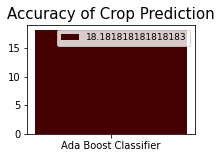

In [63]:
AB1=accuracy.mean() *100
def graph():
    data=[AB1]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#450000"))
    plt.title("Accuracy of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [64]:
#Getting Precision
precision = precision_score(y_test,predicted_ab,average='weighted') # precision tp / (tp + fp) 
print('Precision of Ada Boost Classifier is: ',precision*100)

Precision of Ada Boost Classifier is:  9.358288770053475


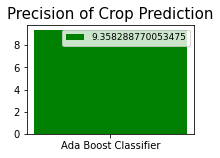

In [65]:
AB2=precision.mean() *100
def graph():
    data=[AB2]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("green"))
    plt.title("Precision of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [66]:
#Getting Recall
recall = recall_score(y_test,predicted_ab,average='weighted') # recall: tp / (tp + fn)
print('Recall of Ada Boost Classifier is: ',recall*100)

Recall of Ada Boost Classifier is:  18.181818181818183


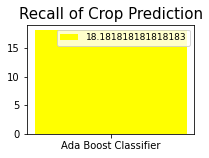

In [67]:
AB3=recall.mean() *100
def graph():
    data=[AB3]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("yellow"))
    plt.title("Recall of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [68]:
#Getting F1 Score
f1 = f1_score(y_test,predicted_ab,average='weighted') # f1: 2 tp / (2 tp + fp + fn)
print('F1 Score of Ada Boost Classifier is: ',f1*100)

F1 Score of Ada Boost Classifier is:  11.11111111111111


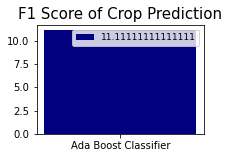

In [69]:
AB4=f1.mean() *100
def graph():
    data=[AB4]
    alg="Ada Boost Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#000080"))
    plt.title("F1 Score of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [70]:
#Classification Report
cr = classification_report(y_test,predicted_ab)
print('Classification report\n',cr)

Classification report
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.06      1.00      0.11        30
           2       0.00      0.00      0.00        30
           3       0.50      1.00      0.67        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        30
          15       1.00      1.00      1.00        30
          16       0.00      0.00      0.00        30
    

In [71]:
#Confusion Matrix
cm = confusion_matrix(y_test,predicted_ab)
print('Confusion matrix\n',cm)

Confusion matrix
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0

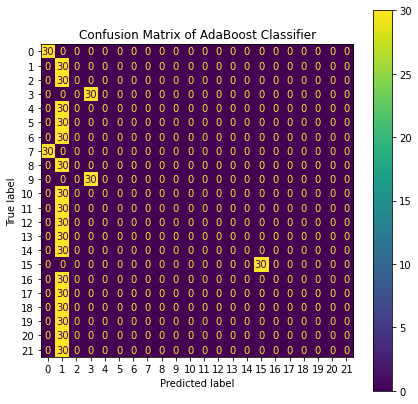

In [72]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(ab, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.show()

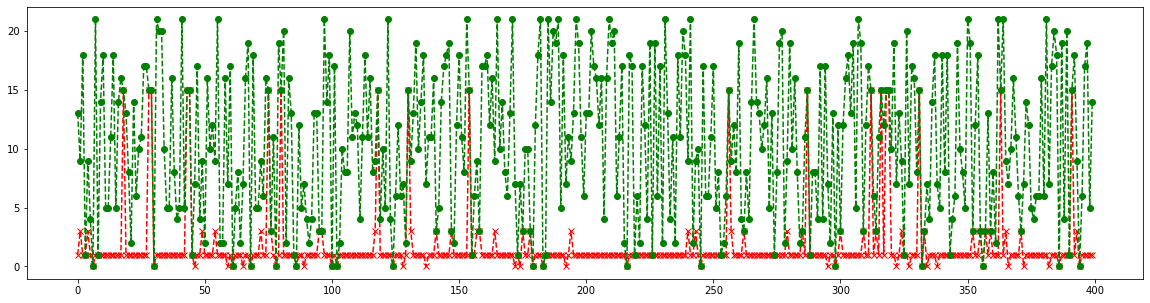

In [73]:
DF3= p.DataFrame()
DF3["y_test"] = y_test
DF3["predicted"] = predicted_ab
DF3.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF3["predicted"][:400], marker='x', linestyle='dashed', color='red')
plt.plot(DF3["y_test"][:400],  marker='o', linestyle='dashed', color='green')
plt.show()

In [74]:
#Saving Model\
joblib.dump(ab,'ab.pkl')

['ab.pkl']

# Module 6 Voting Classifier

In [75]:
vot_clf = VotingClassifier(estimators=[('DecisionTree', dt), ('NaiveBayes', nb), ('AdaBoostClassifier', ab)], voting='hard')

In [76]:
vot_clf.fit(X_train, y_train)
pred_vtng = vot_clf.predict(X_test)

In [77]:
#Getting Accuracy
accuracy = accuracy_score(y_test,pred_vtng) # accuracy: (tp + tn) / (p + n)
print('Accuracy of Voting Classifier is: ',accuracy*100)

Accuracy of Voting Classifier is:  98.63636363636363


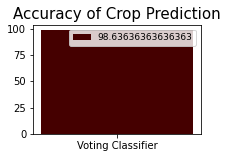

In [78]:
VC1=accuracy.mean() *100
def graph():
    data=[VC1]
    alg="Voting Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#450000"))
    plt.title("Accuracy of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [79]:
#Getting Precision
precision = precision_score(y_test,pred_vtng,average='weighted') # precision tp / (tp + fp) 
print('Precision of Voting Classifier is: ',precision*100)

Precision of Voting Classifier is:  98.89643463497454


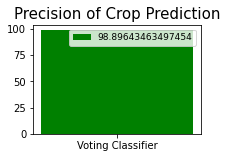

In [80]:
VC2=precision.mean() *100
def graph():
    data=[VC2]
    alg="Voting Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("green"))
    plt.title("Precision of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [81]:
#Getting Recall
recall = recall_score(y_test,pred_vtng,average='weighted') # recall: tp / (tp + fn)
print('Recall of Voting Classifier is: ',recall*100)

Recall of Voting Classifier is:  98.63636363636363


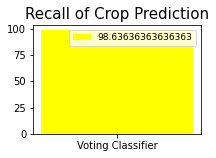

In [82]:
VC3=recall.mean() *100
def graph():
    data=[VC3]
    alg="Voting Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("yellow"))
    plt.title("Recall of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [83]:
#Getting F1 Score
f1 = f1_score(y_test,pred_vtng,average='weighted') # f1: 2 tp / (2 tp + fp + fn)
print('F1 Score of Voting Classifier is: ',f1*100)

F1 Score of Voting Classifier is:  98.69203735727399


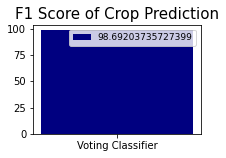

In [84]:
VC4=f1.mean() *100
def graph():
    data=[VC4]
    alg="Voting Classifier"
    plt.figure(figsize=(3,2))
    b=plt.bar(alg,data,color=("#000080"))
    plt.title("F1 Score of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

In [85]:
#Classification Report
cr = classification_report(y_test,pred_vtng)
print('Classification report\n',cr)

Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.79      1.00      0.88        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.98        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       1.00      0.93      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
    

In [86]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred_vtng)
print('Confusion matrix\n',cm)

Confusion matrix
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

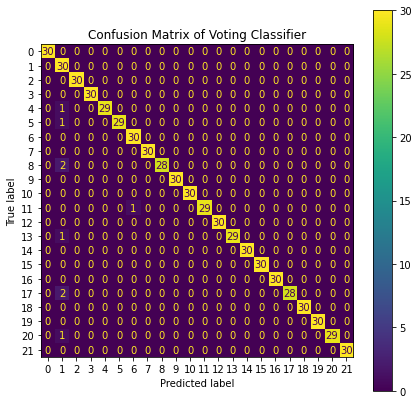

In [87]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(vot_clf, X_test, y_test, ax=ax)
plt.title('Confusion Matrix of Voting Classifier')
plt.show()

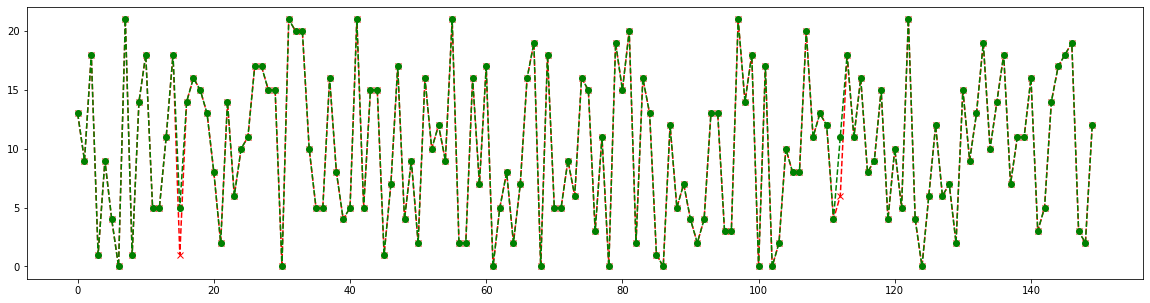

In [88]:
DF4 = p.DataFrame()
DF4["y_test"] = y_test
DF4["predicted"] = pred_vtng
DF4.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF4["predicted"][:150], marker='x', linestyle='dashed', color='red')
plt.plot(DF4["y_test"][:150],  marker='o', linestyle='dashed', color='green')
plt.show()

In [89]:
#Saving Model
joblib.dump(vot_clf,'vot_clf.pkl')

['vot_clf.pkl']

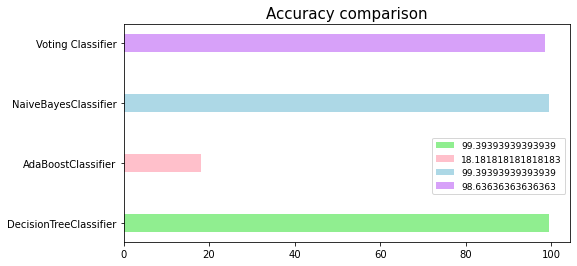

In [90]:
def graph():
    data=[DT1,AB1,NB1,VC1]
    alg=["DecisionTreeClassifier","AdaBoostClassifier","NaiveBayesClassifier","Voting Classifier"]
    plt.figure(figsize=(8,4))
    b=plt.barh(alg,data,height=0.3, color=['lightgreen','pink','lightblue','#D7A1F9'])
    plt.title("Accuracy comparison",fontsize=15)
    plt.legend(b,data,fontsize=9, bbox_to_anchor=(1.0, 0.5))
graph()

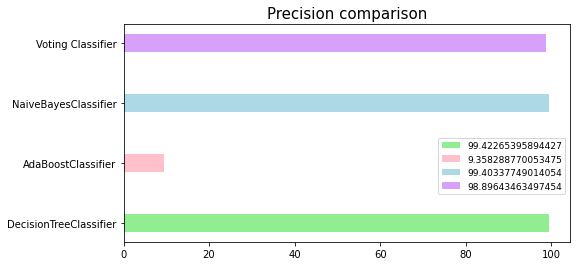

In [91]:
def graph():
    data=[DT2,AB2,NB2,VC2]
    alg=["DecisionTreeClassifier","AdaBoostClassifier","NaiveBayesClassifier","Voting Classifier"]
    plt.figure(figsize=(8,4))
    b=plt.barh(alg,data,height=0.3, color=['lightgreen','pink','lightblue','#D7A1F9'])
    plt.title("Precision comparison",fontsize=15)
    plt.legend(b,data,fontsize=9,bbox_to_anchor=(1.0, 0.5))
graph()

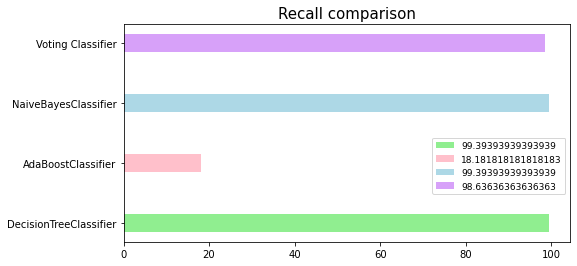

In [92]:
def graph():
    data=[DT3,AB3,NB3,VC3]
    alg=["DecisionTreeClassifier","AdaBoostClassifier","NaiveBayesClassifier","Voting Classifier"]
    plt.figure(figsize=(8,4))
    b=plt.barh(alg,data,height=0.3, color=['lightgreen','pink','lightblue','#D7A1F9'])
    plt.title("Recall comparison",fontsize=15)
    plt.legend(b,data,fontsize=9,bbox_to_anchor=(1.0, 0.5))
graph()

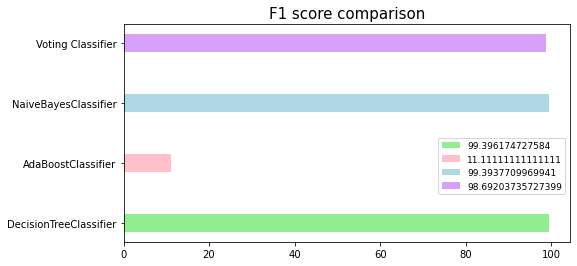

In [93]:
def graph():
    data=[DT4,AB4,NB4,VC4]
    alg=["DecisionTreeClassifier","AdaBoostClassifier","NaiveBayesClassifier","Voting Classifier"]
    plt.figure(figsize=(8,4))
    b=plt.barh(alg,data,height=0.3, color=['lightgreen','pink','lightblue','#D7A1F9'])
    plt.title("F1 score comparison",fontsize=15)
    plt.legend(b,data,fontsize=9, bbox_to_anchor=(1.0, 0.5))
graph()

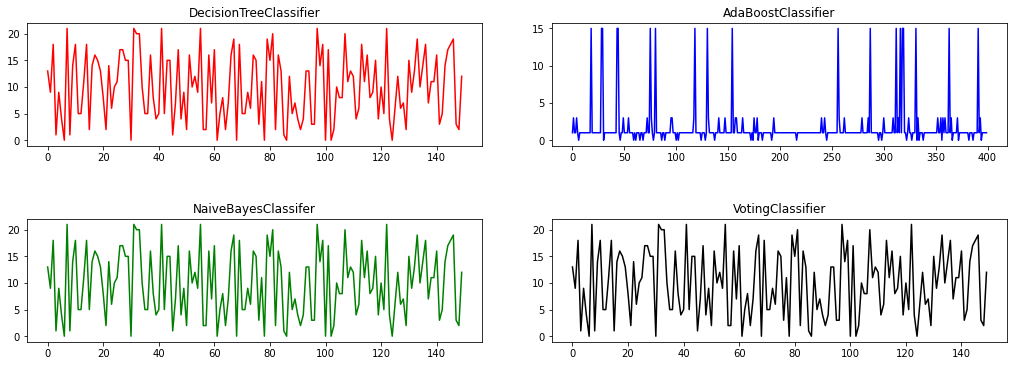

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(2, 2, 1)
plt.title("DecisionTreeClassifier")
plt.plot(DF1["predicted"][:150],color='red')
plt.subplot(2,2,3)
plt.title("NaiveBayesClassifer")
plt.plot(DF2["predicted"][:150],color='green')
plt.subplot(2, 2, 2)
plt.title("AdaBoostClassifier")
plt.plot(DF3["predicted"][:400],color='blue')
plt.subplot(2,2,4)
plt.title("VotingClassifier")
plt.plot(DF4["predicted"][:150],color='black')
plt.tight_layout(4)
plt.show()

In [95]:
finalaccuracy_dt = cross_val_score(dt, inputs, output, scoring='accuracy')
print('Cross validation test results of accuracy of DecisionTreeClassifier:')
print(finalaccuracy_dt)
finalaccuracy_ab = cross_val_score(ab, inputs, output, scoring='accuracy')
print('Cross validation test results of accuracy of AdaBoostClassifier:')
print(finalaccuracy_ab)
finalaccuracy_nb = cross_val_score(nb, inputs, output, scoring='accuracy')
print('Cross validation test results of accuracy of NaiveBayesClassifier:')
print(finalaccuracy_nb)
finalaccuracy_vt = cross_val_score(vot_clf, inputs, output, scoring='accuracy')
print('Cross validation test results of accuracy of VotingClassifier:')
print(finalaccuracy_vt)

Cross validation test results of accuracy of DecisionTreeClassifier:
[0.98636364 0.98409091 0.98863636 0.99090909 0.98181818]
Cross validation test results of accuracy of AdaBoostClassifier:
[0.22727273 0.18181818 0.18181818 0.18181818 0.18181818]
Cross validation test results of accuracy of NaiveBayesClassifier:
[0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Cross validation test results of accuracy of VotingClassifier:
[1.         0.98636364 0.98636364 0.98863636 0.97954545]


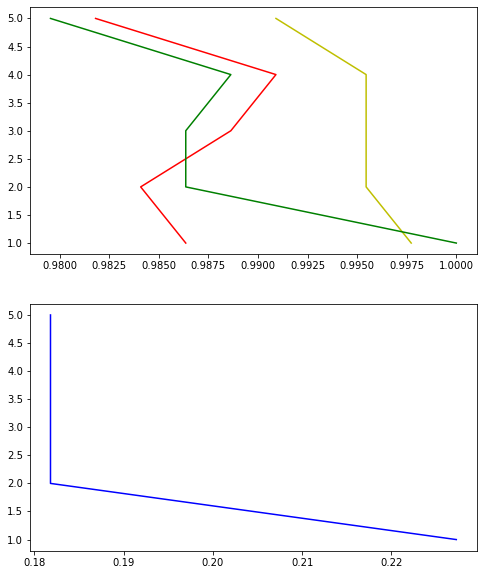

In [96]:
a=[1,2,3,4,5]
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt_d=plt.plot(finalaccuracy_dt, a, color = 'r')
#plt.legend(plt_d,"DecisionTreeClassifier",fontsize=9,loc='center left', bbox_to_anchor=(1.03, 0.5),fancybox=True)
plt_n=plt.plot(finalaccuracy_nb, a, color = 'y')
#plt.legend(plt_n,"NaiveBayesClassifier",fontsize=9,loc='center left', bbox_to_anchor=(1.04, 0.5),fancybox=True)
plt_v=plt.plot(finalaccuracy_vt, a, color = 'g')
plt.subplot(2,1,2)
plt_a=plt.plot(finalaccuracy_ab, a, color = 'b')
plt_arr=[plt_d,plt_n,plt_v,plt_a]
n_arr=["DecisionTreeClassifier","NaiveBayesClassifier","VotingClassifier","AdaBoostClassifier"]
plt.show()